In [208]:
import random
import math

import numpy as np

from matplotlib import pyplot as plt

In [209]:
def uniform_circle(c: tuple, r: float, n: int):
    points = []

    for i in range(n):
        angle = random.uniform(0, 2 * math.pi)
        dist = random.uniform(0, r)

        x = c[0] + dist * math.cos(angle)
        y = c[1] + dist * math.sin(angle)

        points.append([x, y])

    return np.array(points)

### Generate samples and dataset

In [210]:
sample1 = uniform_circle((-1, 1), 2, 250)
labels1 = np.full(len(sample1), 1)

sample2 = uniform_circle((1, -1), 2, 250)
labels2 = np.full(len(sample2), -1)

data = np.vstack((
    sample1,
    sample2
))

labels = np.hstack((
    labels1,
    labels2
))

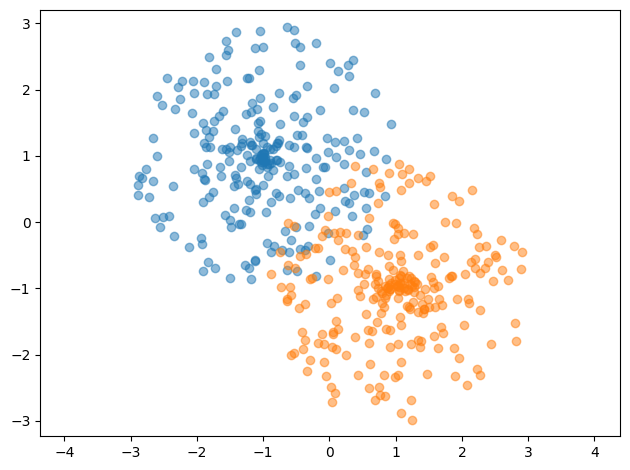

In [211]:
plt.scatter(sample1[:, 0], sample1[:, 1], alpha=0.5)
plt.scatter(sample2[:, 0], sample2[:, 1], alpha=0.5)

plt.axis('equal')
plt.tight_layout()
plt.show()

### Split dataset to test and train

In [212]:
test_frac = 0.8

p = np.random.permutation(len(data))

test_size = int(p.size * test_frac)
train_size = int(p.size * (1 - test_frac))

idx_test = p[0:test_size]
idx_train = p[test_size:p.size]

x_test = np.array(data[idx_test])
y_test = np.array(labels[idx_test])

x_train = np.array(data[idx_train])
y_train = np.array(labels[idx_train])

### Define forward pass and loss functions

In [213]:
def predict(w1, w2, b, x):
    return w1 * x[0] + w2 * x[1] + b


def loss(w1, w2, b, x, y):
    ypred = np.array([predict(w1, w2, b, xi) for xi in x])
    d = np.linalg.norm(ypred-y)
    return np.mean(d)

### Define model parameters and train it

In [214]:
w1 = random.uniform(-1, 1)
w2 = random.uniform(-1, 1)
b = 0

lr = 1e-2
batch_size = 8
max_epoch = 100

print('untrained loss: ', loss(w1, w2, b, x_test, y_test).round(3))

n = len(x_train)

for epoch in range(max_epoch):
    idxs = np.random.permutation(n)

    for i in range(n//batch_size):
        ibegin, iend = i * batch_size, min((i + 1) * batch_size, n - 1)
        batch_idxs = idxs[ibegin:iend]

        dw1 = 0
        dw2 = 0
        db = 0

        for j in batch_idxs:
            yPred = predict(w1, w2, b, x_train[j])

            dLdw1 = 2 * (yPred - y_train[j]) * x_train[j][0]
            dLdw2 = 2 * (yPred - y_train[j]) * x_train[j][1]
            dLdb = yPred

            dw1 += dLdw1
            dw2 += dLdw2
            db += dLdb

        w1 -= lr * dw1
        w2 -= lr * dw2
        b -= lr * db

print('trained loss: ', loss(w1, w2, b, x_test, y_test).round(3))

untrained loss:  15.321
trained loss:  10.261


### Calculate accuracy metric

In [215]:
TP_count = 0
for x, y in zip(x_test, y_test):
    yPred = predict(w1, w2, b, x)
    TP_count += 1 if np.argmax(yPred) == np.argmax(y) else 0

accuracy = TP_count / len(x_test)
print(f"test set accuracy: {round(accuracy * 100, 2)}%")

test set accuracy: 100.0%


### Print model parameters values

In [216]:
print(f'w1 = {round(w1, 3)}')
print(f'w2 = {round(w2, 3)}')
print(f'b = {round(b, 3)}')

w1 = -0.39
w2 = 0.377
b = 0.049


### Visualize model decision boundary

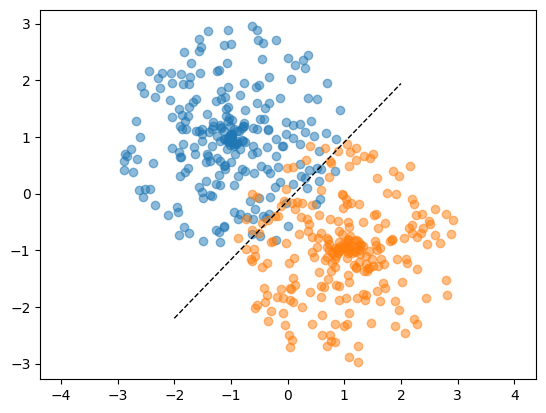

In [217]:
x = np.linspace(-2, 2, 100)
y = -w1 / w2 * x - b / w2

plt.scatter(sample1[:, 0], sample1[:, 1], alpha=0.5)
plt.scatter(sample2[:, 0], sample2[:, 1], alpha=0.5)

plt.plot(x, y, c='black', lw=1, ls='--')

plt.axis('equal')
plt.show()